In [1]:
import gpflow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('../')
from GPHetero import hetero_kernels, hetero_likelihoods, hetero_gpmc

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

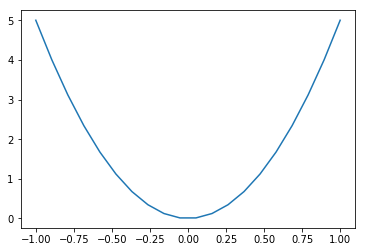

In [2]:
X = np.linspace(-1, 1, 20)[:,None]
Y = 5*X**2
Xnorm = X

plt.plot(X,Y)

In [3]:
#build the model
k1 = hetero_kernels.RBF(1)
nonstat = hetero_kernels.NonStationaryLengthscaleRBF()
m = hetero_gpmc.GPMCAdaptiveLengthscale(Xnorm, Y[:,None], k1, nonstat)

In [10]:
Xnorm.shape

(20, 1)

In [5]:
#m.kern1.lengthscales = 0.1
#m.kern1.lengthscales.fixed = True
#m.kern1.variance = .1
#m.kern1.variance.fixed = True
m.kern1.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
m.kern1.variance.prior = gpflow.priors.Gamma(1., 1.)

m.likelihood.variance = 0.01
m.likelihood.variance.fixed = True

#m.nonstat.signal_variance = 2.
#m.nonstat.signal_variance.fixed = True
m.nonstat.signal_variance.prior = gpflow.priors.Gamma(1., 1.)

In [6]:
m.optimize(maxiter=5000) # start near MAP

      fun: array([ 53375.22540536])
 hess_inv: <43x43 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -8.85222572e-02,  -1.01935197e+00,   1.83379870e-01,
         4.37713970e-01,   3.56899394e-01,   2.84367378e-01,
         2.27542968e-01,   1.44050086e-01,   9.88479543e-02,
         7.67903831e-02,   5.42835715e-02,   3.40793129e-02,
         2.28925933e-02,   2.21158370e-02,   2.20905103e-02,
         1.61634088e-02,   9.27732894e-03,   6.28675571e-03,
         5.59452518e-03,   4.58135659e-03,   2.24191608e+00,
         1.84696779e+00,   5.91692326e-01,   6.98561887e-01,
         5.60015728e-01,   3.46169245e-01,   2.15726234e-01,
         1.61743551e-01,   1.41332715e-01,   1.19347694e-01,
         8.15573620e-02,   3.60773771e-02,  -1.40917652e-03,
        -1.95448733e-02,  -1.48392464e-02,   7.35786285e-03,
         3.44039549e-02,   5.26702645e-02,   5.60044165e-02,
         4.84338686e-02,   1.44370512e-01,   1.27013253e-01,
         9.62490359e-01])
  message: 'CON

In [7]:
m

Name,values,prior,constraint
adaptive_lengthscale_gp.V1,[[ 0.23312732] [ 0.05847107] [ 0.16061272] [ 0.0913778 ] [ 0.07424107] [ 0.04464978] [ 0.02564815] [ 0.01641588] [ 0.02446724] [ 0.04161075] [ 0.05247434] [ 0.0590941 ] [ 0.06901101] [ 0.08117551] [ 0.08595127] [ 0.07840518] [ 0.06269527] [ 0.04507365] [ 0.02870533] [ 0.01481904]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp.V2,[[ 1.32708263] [ 0.095159 ] [ 0.31319786] [ 0.53408144] [ 0.49825339] [ 0.36510444] [ 0.29485563] [ 0.28371955] [ 0.28657324] [ 0.27289306] [ 0.23738006] [ 0.19156955] [ 0.14936913] [ 0.12020394] [ 0.10861569] [ 0.11331012] [ 0.12671441] [ 0.1389488 ] [ 0.14386258] [ 0.14078034]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp.kern1.lengthscales,[ 0.73376391],"Ga([ 1.],[ 1.])",+ve
adaptive_lengthscale_gp.kern1.variance,[ 0.86276647],"Ga([ 1.],[ 1.])",+ve
adaptive_lengthscale_gp.likelihood.variance,[ 0.01],None,[FIXED]
adaptive_lengthscale_gp.nonstat.signal_variance,[ 1.92029626],"Ga([ 1.],[ 1.])",+ve


In [8]:
samples = m.sample(2000, verbose=True, epsilon=0.01, thin = 2, burn = 1000, Lmax = 80)

burn-in sampling started


InvalidArgumentError: Input matrix is not invertible.
	 [[Node: gradients/adaptive_lengthscale_gp.build_likelihood/Cholesky_1_grad/MatrixTriangularSolve = MatrixTriangularSolve[T=DT_DOUBLE, adjoint=false, lower=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](adaptive_lengthscale_gp.build_likelihood/Cholesky_1, gradients/adaptive_lengthscale_gp.build_likelihood/Cholesky_1_grad/eye/MatrixDiag)]]

Caused by op u'gradients/adaptive_lengthscale_gp.build_likelihood/Cholesky_1_grad/MatrixTriangularSolve', defined at:
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2718, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2828, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-ea490ca2448d>", line 1, in <module>
    m.optimize(maxiter=5000) # start near MAP
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/gpflow-0.4.0-py2.7.egg/gpflow/model.py", line 250, in optimize
    return self._optimize_np(method, tol, callback, maxiter, **kw)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/gpflow-0.4.0-py2.7.egg/gpflow/model.py", line 311, in _optimize_np
    self.compile()
  File "../GPHetero/hetero_gpmc.py", line 359, in compile
    optimizer=optimizer)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/gpflow-0.4.0-py2.7.egg/gpflow/model.py", line 157, in compile
    g = tf.gradients(f, self._free_vars)[0]
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py", line 488, in gradients
    gate_gradients, aggregation_method, stop_gradients)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py", line 625, in _GradientsHelper
    lambda: grad_fn(op, *out_grads))
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py", line 379, in _MaybeCompile
    return grad_fn()  # Exit early
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gradients_impl.py", line 625, in <lambda>
    lambda: grad_fn(op, *out_grads))
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/linalg_grad.py", line 70, in _CholeskyGrad
    dtype=l.dtype))
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gen_linalg_ops.py", line 1398, in matrix_triangular_solve
    adjoint=adjoint, name=name)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 3290, in create_op
    op_def=op_def)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

...which was originally created as op u'adaptive_lengthscale_gp.build_likelihood/Cholesky_1', defined at:
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
[elided 22 identical lines from previous traceback]
  File "../GPHetero/hetero_gpmc.py", line 359, in compile
    optimizer=optimizer)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/gpflow-0.4.0-py2.7.egg/gpflow/model.py", line 156, in compile
    f = self.build_likelihood() + self.build_prior()
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/gpflow-0.4.0-py2.7.egg/gpflow/scoping.py", line 43, in runnable
    return f(*args, **kwargs)
  File "../GPHetero/hetero_gpmc.py", line 376, in build_likelihood
    Lnonstat = tf.cholesky(Knonstat + tf.eye(tf.shape(self.X)[0], dtype=float_type)*1e-4)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/ops/gen_linalg_ops.py", line 704, in cholesky
    "Cholesky", input=input, name=name)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 3290, in create_op
    op_def=op_def)
  File "/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Input matrix is not invertible.
	 [[Node: gradients/adaptive_lengthscale_gp.build_likelihood/Cholesky_1_grad/MatrixTriangularSolve = MatrixTriangularSolve[T=DT_DOUBLE, adjoint=false, lower=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](adaptive_lengthscale_gp.build_likelihood/Cholesky_1, gradients/adaptive_lengthscale_gp.build_likelihood/Cholesky_1_grad/eye/MatrixDiag)]]


In [ ]:
xnew = np.linspace(-1,1,50)[:,None]
xx = xnew

In [ ]:
sample_df = m.get_samples_df(samples)

In [ ]:
sample_df

In [ ]:
mean_l_mat = np.zeros(shape = (samples.shape[0], xx.shape[0]))
var_l_mat = np.zeros(shape = (samples.shape[0], xx.shape[0]))

In [ ]:
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    mean1, v1 = m.predict_l(xx)
    var1 = v1[:,:]
    mean_l_mat[i,:] = mean1[:,0]
    var_l_mat[i,:] = np.diag(var1)

std_l_mat = np.sqrt(var_l_mat)

In [ ]:
LowerlogL = mean_l_mat - 2*std_l_mat
UpperlogL = mean_l_mat + 2*std_l_mat

In [ ]:
MeanL = np.exp(mean_l_mat)
LowerL = np.exp(LowerlogL)
UpperL = np.exp(UpperlogL)

In [ ]:
mean_f_mat = np.zeros(shape = (samples.shape[0], xx.shape[0]))
var_f_mat = np.zeros(shape = (samples.shape[0], xx.shape[0]))

for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    mean1, v1 = m.predict_f(xx)
    var1 = v1[:,:]
    mean_f_mat[i,:] = mean1[:,0]
    var_f_mat[i,:] = np.diag(var1)

sig_samples = m.nonstat.signal_variance.get_samples_df(samples)
noise_samples = m.likelihood.variance.get_samples_df(samples)
signal_var = np.array([])
noise_var = np.array([])
for s in sig_samples:
    signal_var = np.append(signal_var, s)

for n in noise_samples:
    noise_var = np.append(noise_var, n)
    

In [ ]:
def visualize(Xgrid, Mgrid, Vargrid, noise_var):
    """
    Visualize 1D utility funciton values
    Xgrid : grid states
    Mgrid : mean of GP at those finite grid points
    Vargrid : variance of GP at those finite grid points
    """
    Std_noise = np.sqrt(noise_var)
    signal_std = np.sqrt(signal_var)
 
    Stdgrid = np.sqrt(Vargrid)
    
    lower = Mgrid - 2*Stdgrid
    upper = Mgrid + 2*Stdgrid
    
    lower1 = lower - 2*Std_noise
    upper1 = upper + 2*Std_noise
    
    plt.plot(X, Y, '.')
    line, = plt.plot(Xgrid, Mgrid, lw = 2, color = 'b', label = 'utility', alpha = 0.5)
    plt.fill_between(Xgrid[:,0], lower, upper,
                     color = 'b', alpha = 0.25)
    plt.fill_between(Xgrid[:,0], lower1, upper1,
                     color = 'g', alpha = 0.25)
    plt.xlabel('x')
    plt.ylabel('y')
    return

In [ ]:
mini = 105
maxi = 106
plt.figure(figsize=(12,8))
for i in xrange(mini,maxi):
    visualize(xnew, mean_f_mat[i,:], var_f_mat[i,:], noise_var[i])  

In [ ]:
def visualize_l(Xgrid, M, L, U):
    """
    Visualize 1D utility funciton values
    Xgrid : grid states
    Mgrid : mean of GP at those finite grid points
    Vargrid : variance of GP at those finite grid points
    """
    
    line, = plt.plot(Xgrid, M, lw = 2, color = 'b', label = 'utility', alpha = 0.5)
    plt.fill_between(Xgrid[:,0], L, U,
                     color = 'b', alpha = 0.25)
    #plt.fill_between(Xgrid[:,0], lower1, upper1,
    #                 color = 'g', alpha = 0.25)
    plt.xlabel('x')
    plt.ylabel('y')
    return

In [ ]:
mini = 120
maxi = 121
plt.figure(figsize=(12,8))
for i in xrange(mini,maxi):
    visualize_l(xnew, MeanL[i,:], LowerL[i,:], UpperL[i,:])  